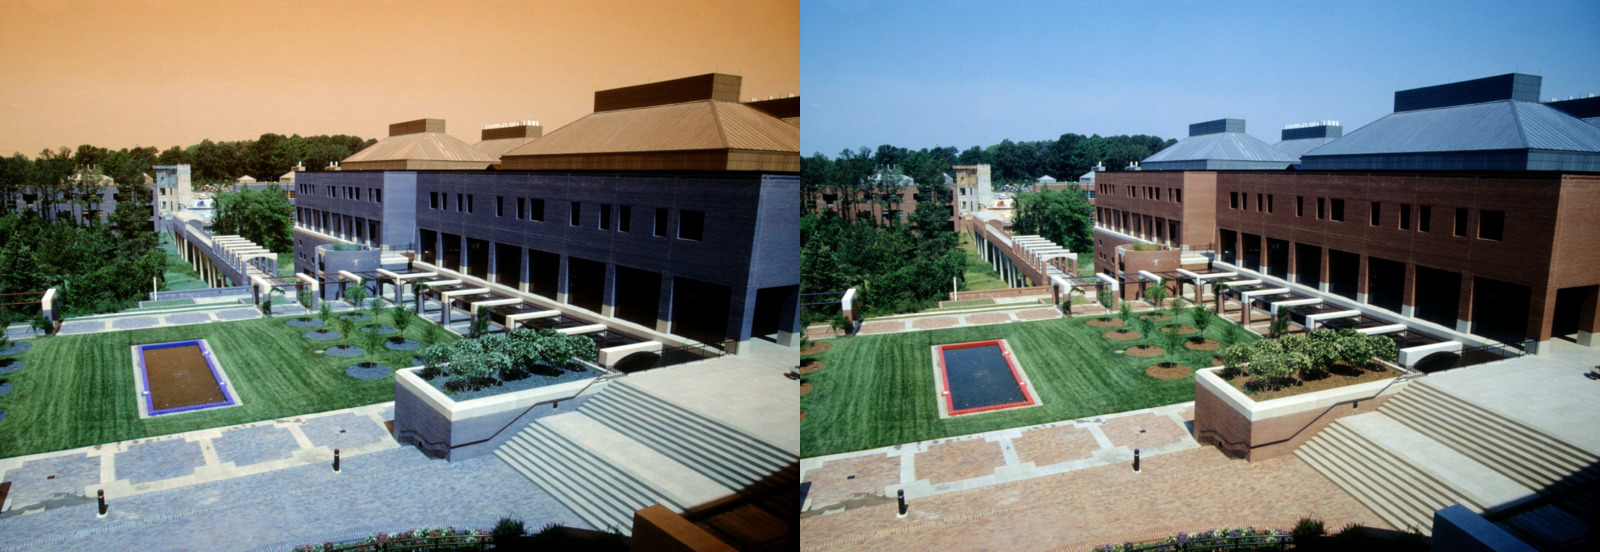

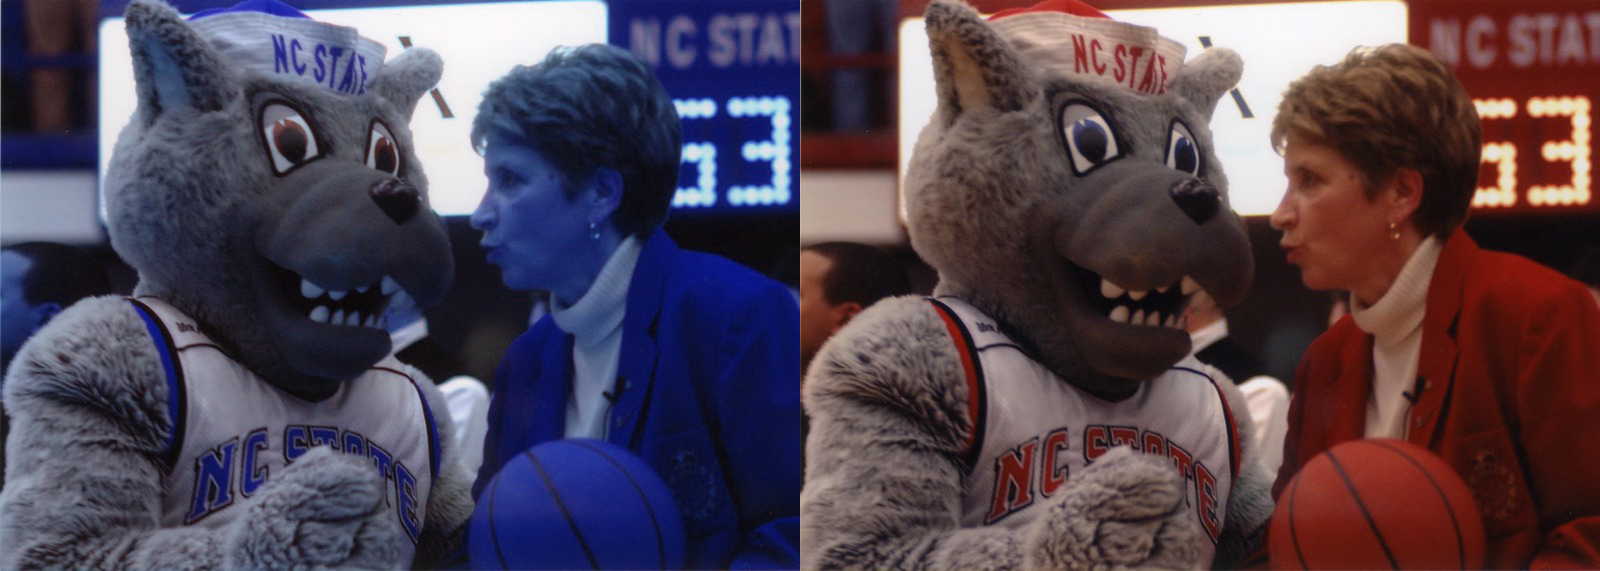

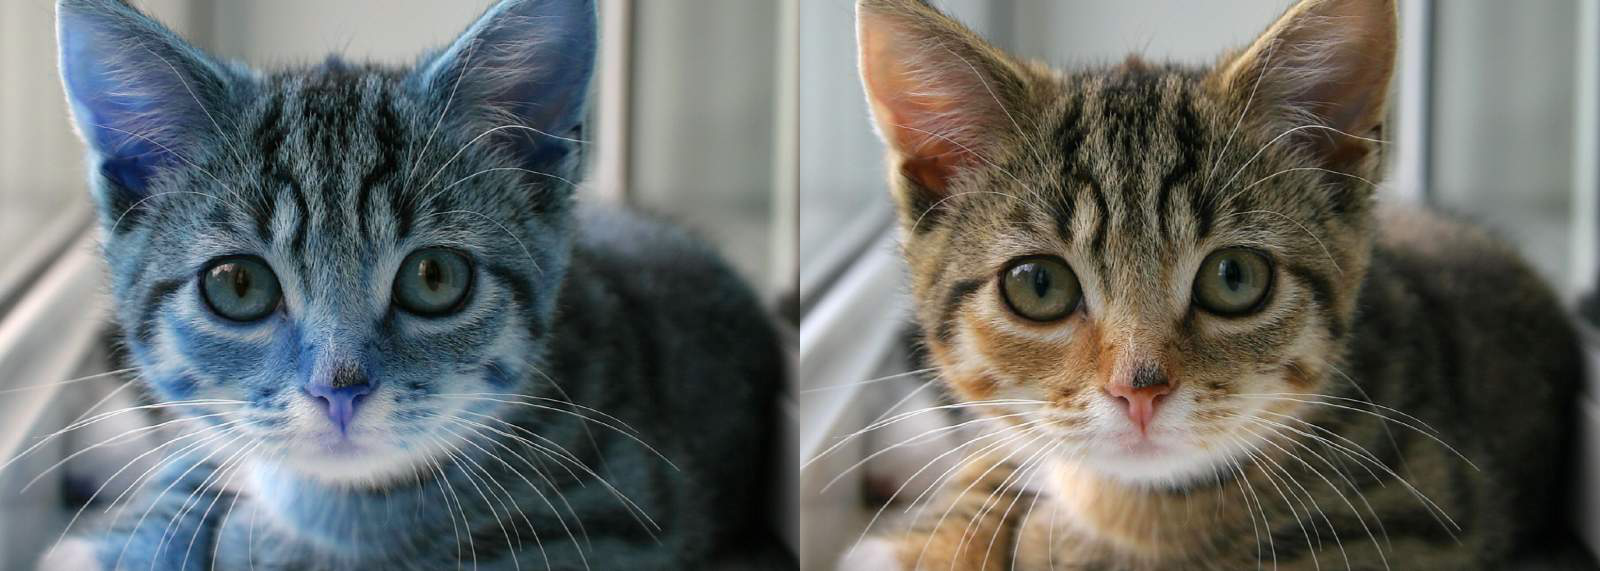

In [ ]:
#Load the Dependencies
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
 
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list
 
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

In [ ]:
 
#Image Contours and Histograms
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


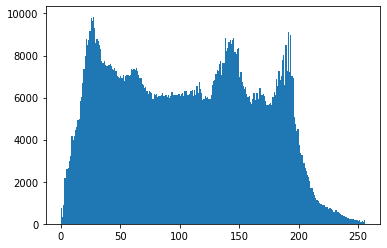

In [ ]:
#Generate Histogram of color image and grayscale image
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

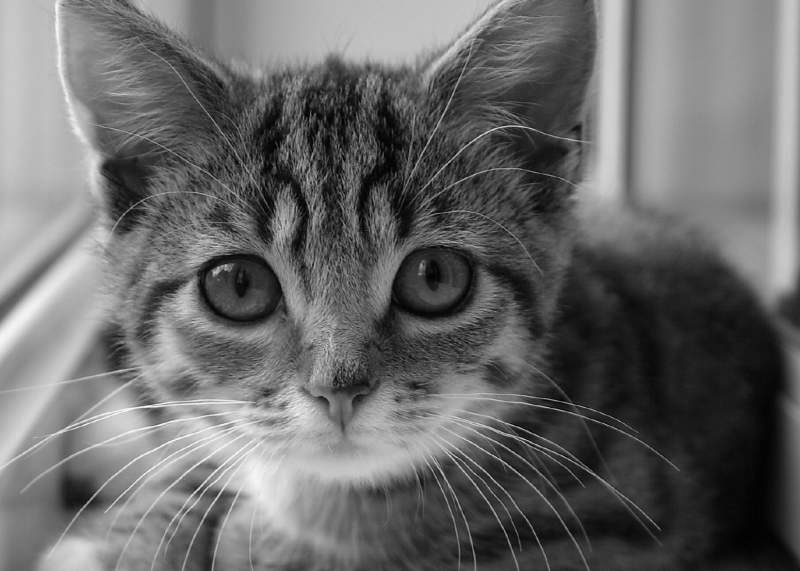

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


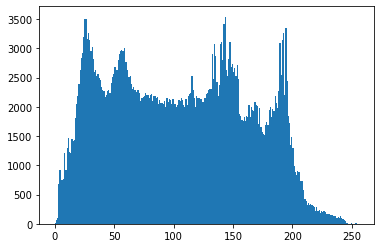

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

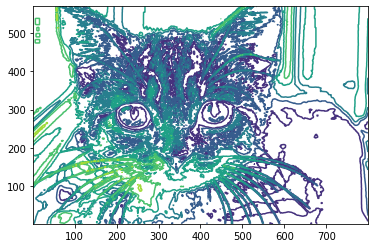

In [ ]:
#Find image contour of the grayscale image
plt.contour(gray_image, origin = "image")

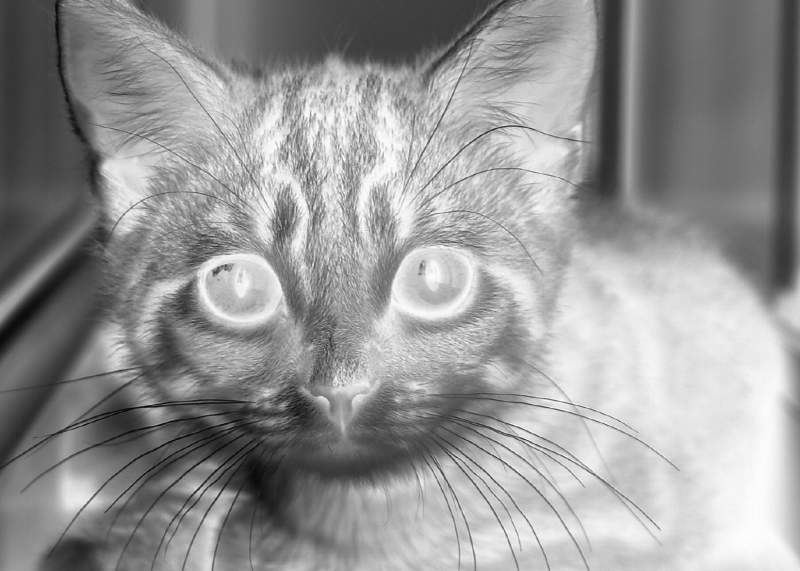

In [ ]:
 
#Grayscale Transform and Histogram Equalization
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)


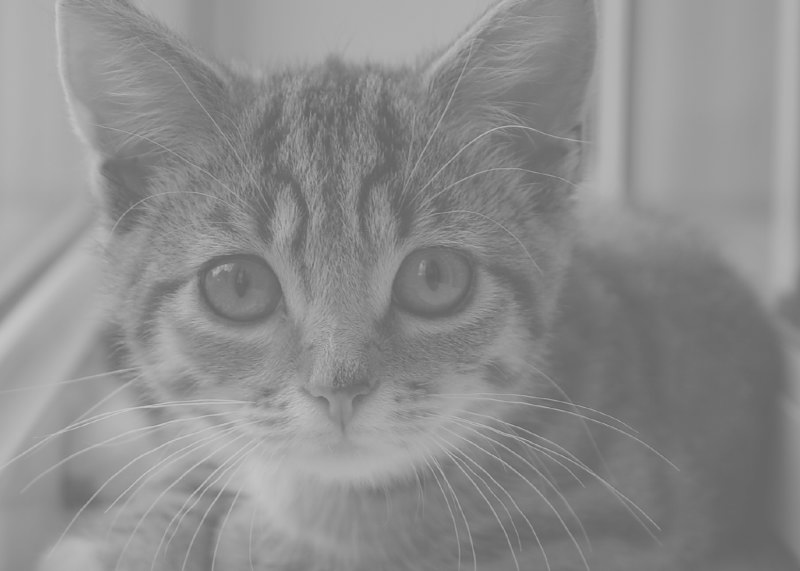

In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

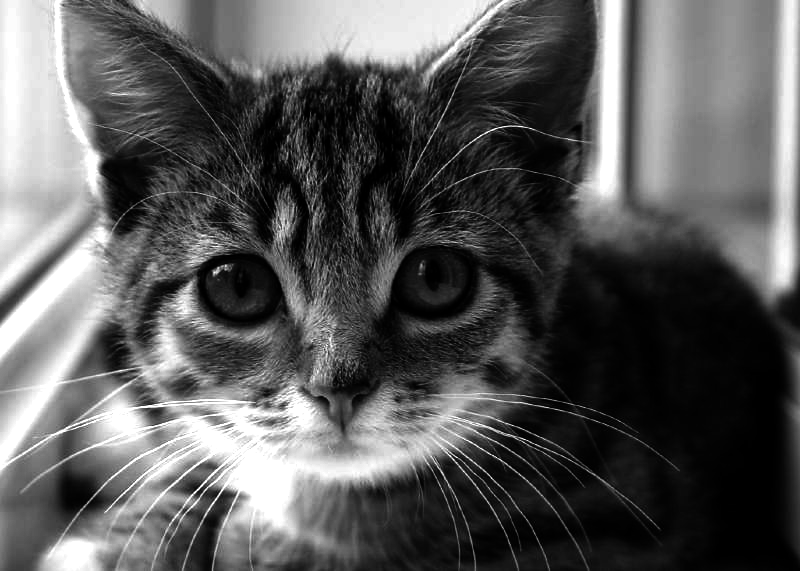

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)


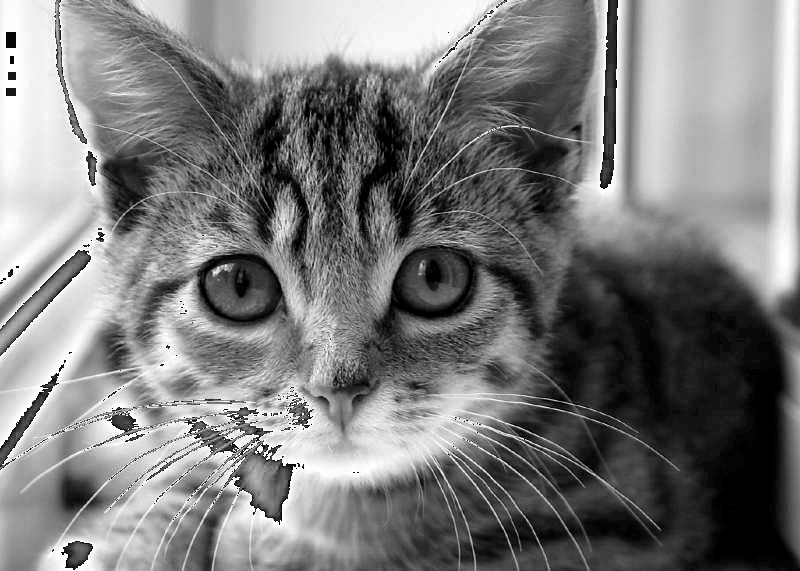

In [ ]:
 
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)


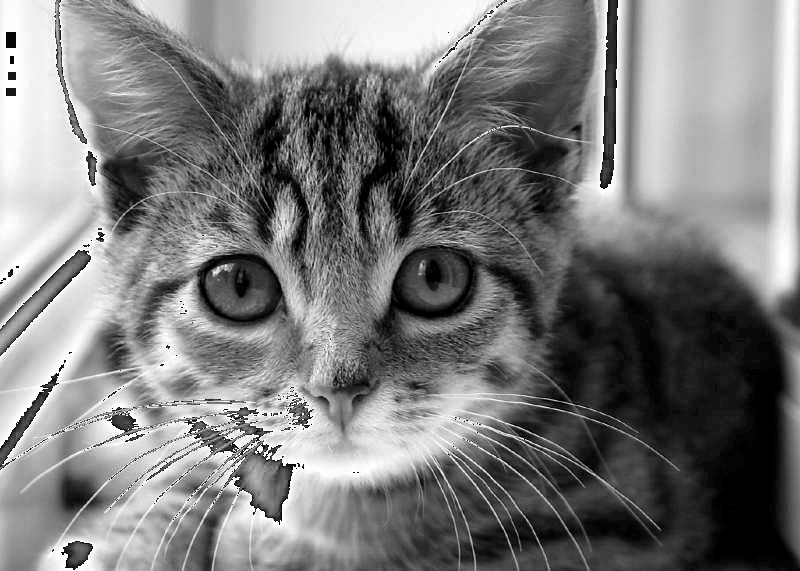

In [ ]:
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)


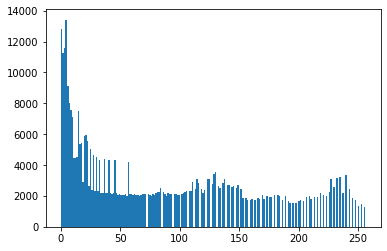

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 200, range = [0, 256])
plt.show()


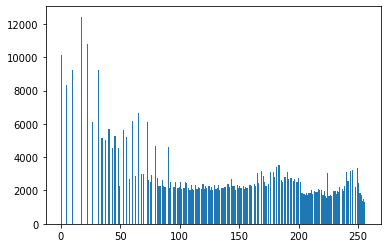

In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()


In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))


In [ ]:
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)


In [ ]:
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))


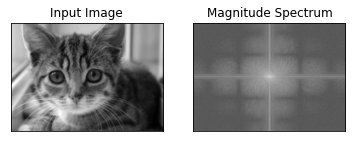

In [ ]:
 
plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
 
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)

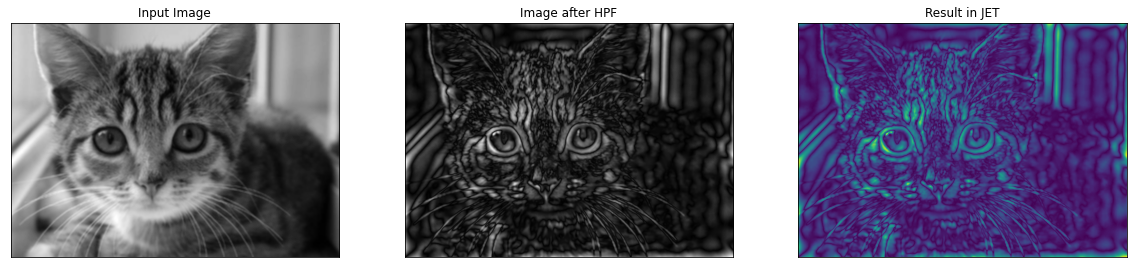

In [ ]:
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()


 
 Create a .csv file, load the .csv file and do the following operations 1. Find the dimension, datatype and do the statistical analysis of the data Loaded. 2. Scale and binarize the data. 3. Label the data and select 2 principal components.


In [ ]:
import csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn. preprocessing import Binarizer 
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [ ]:
# reading the data
data = pd.read_csv("Iris.csv")

In [ ]:
#1. Find the dimension, datatype and do the statistical analysis of the data loaded
 
print(data.shape)
print(data.dtypes)  
print(data. describe())

(150, 4)
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [ ]:
 
#2.	Scale and binarize the data.
 
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn. preprocessing import Binarizer 
array= data.values
data_scaler = preprocessing. MinMaxScaler (feature_range= (0,1)) 
data_rescaled = data_scaler.fit_transform(array)
set_printoptions(precision=1) 
print ("\nScaled data:\n", data_rescaled[0:2])
binarizer = Binarizer(threshold=0.5).fit(array) 
Data_binarized = binarizer.transform(array)
print ("\nBinary data:\n", Data_binarized [0:2])



Scaled data:
 [[0.2 0.6 0.1 0. ]
 [0.2 0.4 0.1 0. ]]

Binary data:
 [[1. 1. 1. 0.]
 [1. 1. 1. 0.]]


In [ ]:
#3. Label the data and select 2 principal components.
 
from sklearn import preprocessing
input_labels = ['red','black','red','green','black','yellow','white'] 
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)
test_labels = ['green','red','black']
encoded_values = encoder.transform(test_labels) 
print ("\nLabels =", test_labels)
print ("Encoded values =", list(encoded_values))



Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]


In [ ]:
 
from sklearn.decomposition import PCA
array= data.values
X = array[:,0:4] 
Y = array[:,3]
pca = PCA(n_components = 2) 
fit = pca.fit(X) 
print("Explained Variance: %s")
print(fit.components_)


Explained Variance: %s
[[ 0.4 -0.1  0.9  0.4]
 [ 0.7  0.7 -0.2 -0.1]]


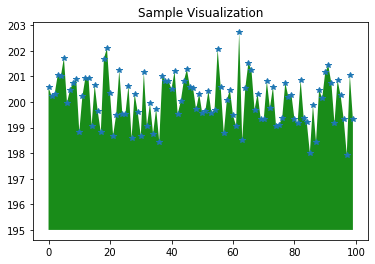

In [49]:
import numpy as np
from matplotlib import pyplot as plt
 
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]
 
plt.plot(x, ys, '*')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.9)
 
plt.title("Sample Visualization")
plt.show()


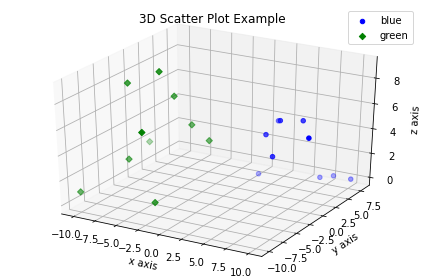

In [41]:
 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = np.random.randint(10, size=10)
z1 = np.random.randint(10, size=10)
 
x2 = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
y2 = np.random.randint(-10, 0, size=10)
z2 = np.random.randint(10, size=10)
 
ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')
ax.scatter(x2, y2, z2, c='g', marker='D', label='green')
 
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()


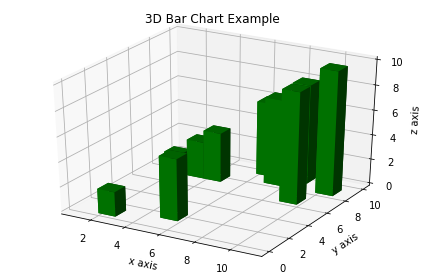

In [42]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = np.random.randint(10, size=10)
z = np.zeros(10)
 
dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 
ax.bar3d(x, y, z, dx, dy, dz, color='g')
 
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Bar Chart Example")
plt.tight_layout()
plt.show()


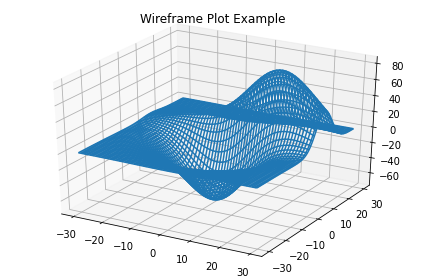

In [48]:
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
x, y, z = axes3d.get_test_data()
 
ax.plot_wireframe(x, y, z, rstride = 2, cstride = 2)
 
plt.title("Wireframe Plot Example")
plt.tight_layout()
plt.show()
